## Fashion MNIST : CNN 과 Callback 구현

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading Fashion MNIST data
# 설명 :  https://www.tensorflow.org/tutorials/keras/classification
# 소스 :  https://github.com/tensorflow/docs-l10n/tree/master/site/ko/tutorials/keras

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(28, 28)
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4]


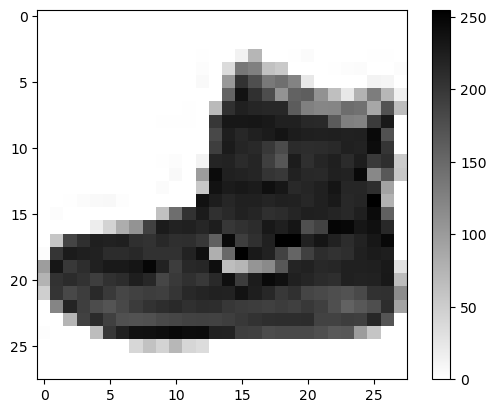

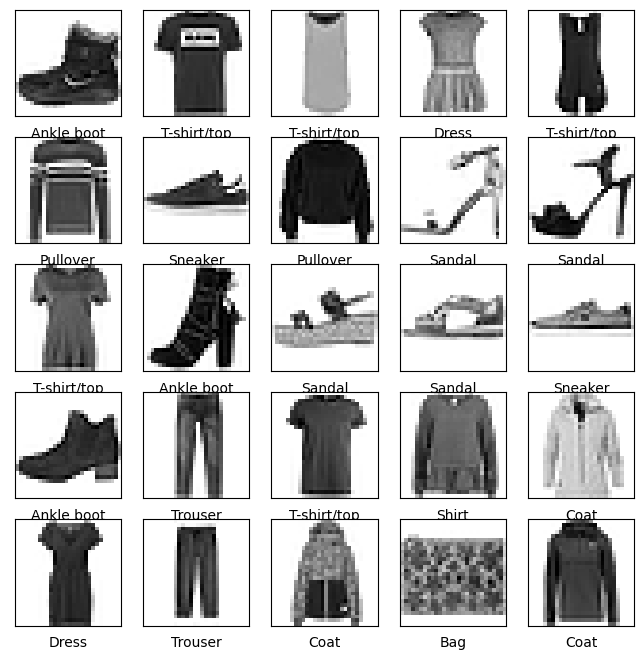

In [3]:
# 이미지 데이터 정보 및 시각화
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(x_train.shape,y_train.shape)  # (60000, 28, 28) (60000,)
print(x_test.shape,y_test.shape)    # (10000, 28, 28) (10000,)
print(x_train[0].shape)             # (28, 28)
# print(x_train[0])
print(y_train[:30])

plt.imshow(x_train[0],cmap=plt.cm.binary)
# plt.imshow(x_train[0],cmap='gray')
plt.colorbar()

plt.figure(figsize=(8,8))         # 그래프 사이즈의 크기 설정, width,height, default:[6.4,4.8]
for k in range(25):
    plt.subplot(5,5,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[k],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[k]])

plt.show()

In [4]:
# 이미지 정규화(normalization) :  0 to 255 ==> 0 to 1
# Z = (X-min())/(max()-min())
x_train = x_train / 255.0
x_test = x_test / 255.0

# print(x_train[0])

In [5]:
# 정규화 함수 직접 구현할 경우(여기서는 불필요)
# Z = (X-min())/(max()-min())
def normalizer(data):
    result = (data - np.min(data,axis=0))/(np.max(data,axis=0) - np.min(data,axis=0))
    return result
    
# print(np.min(x_train,axis=0))   # 0  ...
# print(np.max(x_train,axis=0))   # 255 ... 
# x_train = normalizer(x_train) 
# x_test = nomalizer(x_test)

In [6]:
# 4차원으로 변환
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,280,28,1)
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (1000, 280, 28, 1)


In [7]:
# CNN 모델 구현

# Callback 클래스 구현
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        
    

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),
                           activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________